
# Análise de casos de Suícidio no Brasil a partir de 2000

## Membros
> * Nome: Carlos Augusto dos Santos Neto
> * Nome: Gabriel Koyama Alves

## Disciplina
> * Laboratório de Banco de Dados

# PREPARANDO DADOS

* Importando bibliotecas

In [14]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import _converter

* Recuperando os dados da planilha

In [4]:
data = pd.read_csv('dados/who_suicide_statistics.csv')

* Tipos de variáveis

In [41]:
type_data = pd.DataFrame(data.dtypes, columns=['Tipos de Variáveis'])
type_data.columns.name = 'Variáveis'
type_data

Variáveis,Tipos de Variáveis
country,object
year,int64
sex,object
age,object
suicides_no,float64
population,float64


In [42]:
print('A base de dados apresenta {} registros e {} variáveis'.format(data.shape[0], data.shape[1]))

A base de dados apresenta 43776 registros e 6 variáveis


* Removendos nomes de paises duplicados na base de dados 

In [43]:
countrys = data['country'].drop_duplicates()
countrys.shape[0]
countrys.index = range(0, countrys.shape[0])

* Países na base de dados


In [44]:
countrys_csv = pd.DataFrame(countrys)
countrys_csv.columns.name = 'ID'
countrys_csv.columns.cou = 'ID'
countrys_csv

ID,country
0,Albania
1,Anguilla
2,Antigua and Barbuda
3,Argentina
4,Armenia
5,Aruba
6,Australia
7,Austria
8,Azerbaijan
9,Bahamas


* Filtrando as idades para 15-24 anos e 25-34 anos

In [8]:
selection_filter = data['age'].isin(['15-24 years'])
selection_df = data[selection_filter]
selection_df.index = range(selection_df.shape[0])
selection_df.columns.name = 'ID'
selection_df

ID,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,male,15-24 years,NaN,301400.0
2,Albania,1986,female,15-24 years,NaN,283900.0
3,Albania,1986,male,15-24 years,NaN,306700.0
4,Albania,1987,female,15-24 years,14.0,289700.0
5,Albania,1987,male,15-24 years,21.0,312900.0
6,Albania,1988,female,15-24 years,8.0,295600.0
7,Albania,1988,male,15-24 years,17.0,319200.0
8,Albania,1989,female,15-24 years,5.0,299900.0
9,Albania,1989,male,15-24 years,12.0,323500.0


# Análise no Brasil

* Número de registros

In [10]:
brazil_filter = selection_df['country'] == 'Brazil'
print('O Brasil, possuí {} registros'.format(brazil_filter.shape[0]))

O Brasil, possuí 7296 registros


# Análise de casos de suicídio de homens de 2000 a 2015
## Com idade de 15 a 24 anos

In [47]:
brazil_csv = selection_df[brazil_filter]
sex_filter = brazil_csv['sex'] == 'male'
brazil_csv = brazil_csv[sex_filter]
brazil_csv[-16:]

ID,country,year,sex,age,suicides_no,population
1077,Brazil,2000,male,15-24 years,1037.0,17494250.0
1079,Brazil,2001,male,15-24 years,1262.0,17698960.0
1081,Brazil,2002,male,15-24 years,1226.0,17863758.0
1083,Brazil,2003,male,15-24 years,1259.0,17983317.0
1085,Brazil,2004,male,15-24 years,1275.0,18054195.0
1087,Brazil,2005,male,15-24 years,1247.0,18077858.0
1089,Brazil,2006,male,15-24 years,1293.0,18063460.0
1091,Brazil,2007,male,15-24 years,1267.0,17991928.0
1093,Brazil,2008,male,15-24 years,1375.0,17889839.0
1095,Brazil,2009,male,15-24 years,1270.0,17794434.0


# Análise de casos de suicídio de Mulheres de 2000 a 2015
## Com idade de 15 a 24 anos

<IPython.core.display.Javascript object>


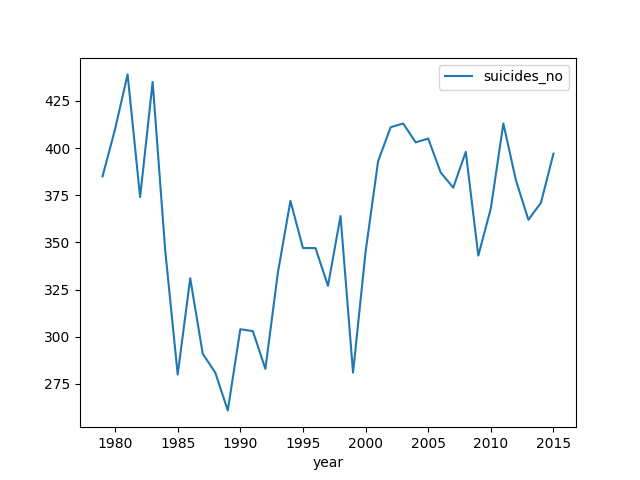

In [15]:
brazil_csv.plot(kind='line', x='year', y='suicides_no')

In [11]:
brazil_csv = selection_df[brazil_filter]
sex_filter = brazil_csv['sex'] == 'female'
brazil_csv = brazil_csv[sex_filter]
brazil_csv[-16:]

ID,country,year,sex,age,suicides_no,population
1076,Brazil,2000,female,15-24 years,345.0,17175577.0
1078,Brazil,2001,female,15-24 years,393.0,17361833.0
1080,Brazil,2002,female,15-24 years,411.0,17507998.0
1082,Brazil,2003,female,15-24 years,413.0,17607810.0
1084,Brazil,2004,female,15-24 years,403.0,17657631.0
1086,Brazil,2005,female,15-24 years,405.0,17659079.0
1088,Brazil,2006,female,15-24 years,387.0,17631557.0
1090,Brazil,2007,female,15-24 years,379.0,17547530.0
1092,Brazil,2008,female,15-24 years,398.0,17432076.0
1094,Brazil,2009,female,15-24 years,343.0,17321655.0


<IPython.core.display.Javascript object>


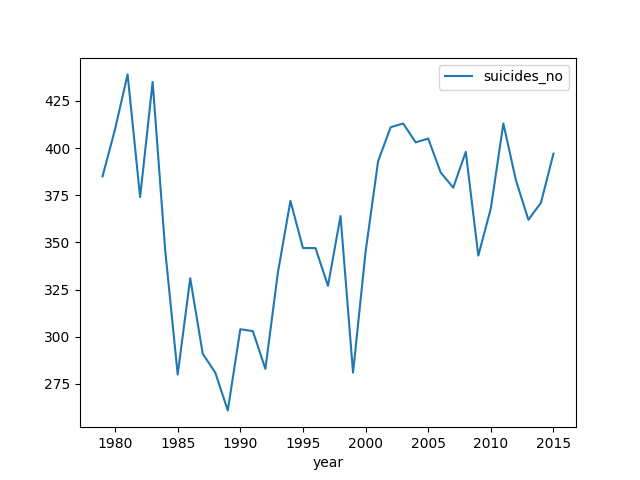

In [16]:
brazil_csv.plot(kind='line', x='year', y='suicides_no')